# Experiment 4 - Accuracy and Robustness of the Online Measurements

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro

# 01. Load the Data

In [6]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

ROOT = '..'

PATH_40_RAFT = 'datasets/evaluation/online/on_surface/4cm/experiment_1682236165'

PATH_80_RAFT = 'datasets/evaluation/online/on_surface/8cm/experiment_1682237066'

PATH_120_RAFT = 'datasets/evaluation/online/on_surface/12cm/experiment_1682237843'

df_40_raft_results = pd.read_csv(os.path.join(ROOT, PATH_40_RAFT, 'results.csv'))

df_80_raft_results = pd.read_csv(os.path.join(ROOT, PATH_80_RAFT, 'results.csv'))

df_120_raft_results = pd.read_csv(os.path.join(ROOT, PATH_120_RAFT, 'results.csv'))

dataframes = {'df_40_raft_results': df_40_raft_results,
              'df_80_raft_results': df_80_raft_results,
              'df_120_raft_results': df_120_raft_results
              }

df_metrics = pd.DataFrame()

metrics_dict = {}

for key in dataframes:
    # Calculate absolute difference
    dataframes[key]['euclidian_diff'] = (dataframes[key]['euclidian'] - dataframes[key]['ground_truth']).abs()

    # Calculate absolute difference
    dataframes[key]['on_surface_diff'] = (dataframes[key]['on_surface'] - dataframes[key]['ground_truth']).abs()

    # Calculate absolute difference
    dataframes[key]['on_surface_spline_diff'] = (dataframes[key]['on_surface_spline'] - dataframes[key]['ground_truth']).abs()

    ae = dataframes[key]['euclidian_diff'].to_numpy()
    
    metrics = {'mae': float(ae.mean()),
               'min': float(ae.min()),
               'std': float(ae.std()),
               'p25': float(np.percentile(ae, 25)),
               'p50': float(np.percentile(ae, 50)),
               'p75': float(np.percentile(ae, 75)),
               'p95': float(np.percentile(ae, 95)),
               'p975': float(np.percentile(ae, 97.5)),
               'max': float(ae.max())}
    
    metrics_dict[key] = metrics
    
    df_metrics = pd.concat([df_metrics, pd.DataFrame([metrics], index=[key])])  
    
print(df_metrics[['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']].round(2).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
 & mae & std & min & p25 & p50 & p75 & p95 & p975 & max \\
\midrule
df_40_raft_results & 0.980000 & 0.440000 & 0.040000 & 0.580000 & 1.090000 & 1.370000 & 1.520000 & 1.540000 & 1.580000 \\
df_80_raft_results & 1.520000 & 1.000000 & 0.010000 & 0.510000 & 1.740000 & 2.490000 & 2.560000 & 2.570000 & 2.590000 \\
df_120_raft_results & 0.760000 & 0.470000 & 0.020000 & 0.400000 & 0.710000 & 1.120000 & 1.480000 & 1.490000 & 1.510000 \\
\bottomrule
\end{tabular}



# 02. Metrics

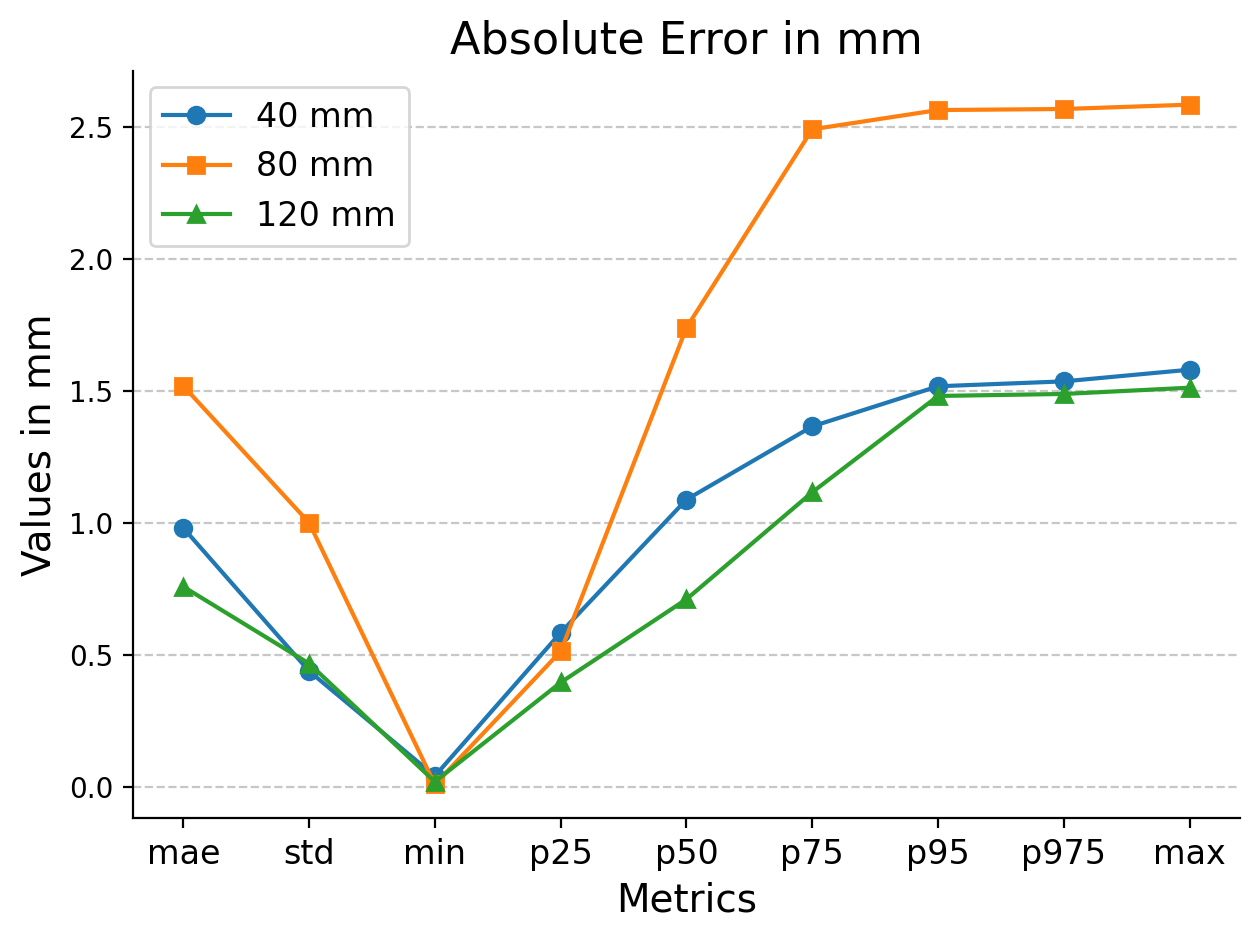

In [7]:
metrics = [metrics_dict['df_40_raft_results'], metrics_dict['df_80_raft_results'], metrics_dict['df_120_raft_results']]
labels = ['40 mm', '80 mm', '120 mm']
# Extract values of interest
keys = ['mae', 'std', 'min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']
values = [[m[key] for key in keys] for m in metrics]

# Set up the plot
fig, ax = plt.subplots(dpi=200)

# Plot the data as line plots
x = np.arange(len(keys))
markers = ['o', 's', '^']
for i, val in enumerate(values):
    ax.plot(x, val, marker=markers[i], label=labels[i])

# Customize plot appearance
ax.set_xticks(x)
ax.set_xticklabels(keys, fontsize=12)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Values in mm', fontsize=14)
ax.set_title('Absolute Error in mm', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

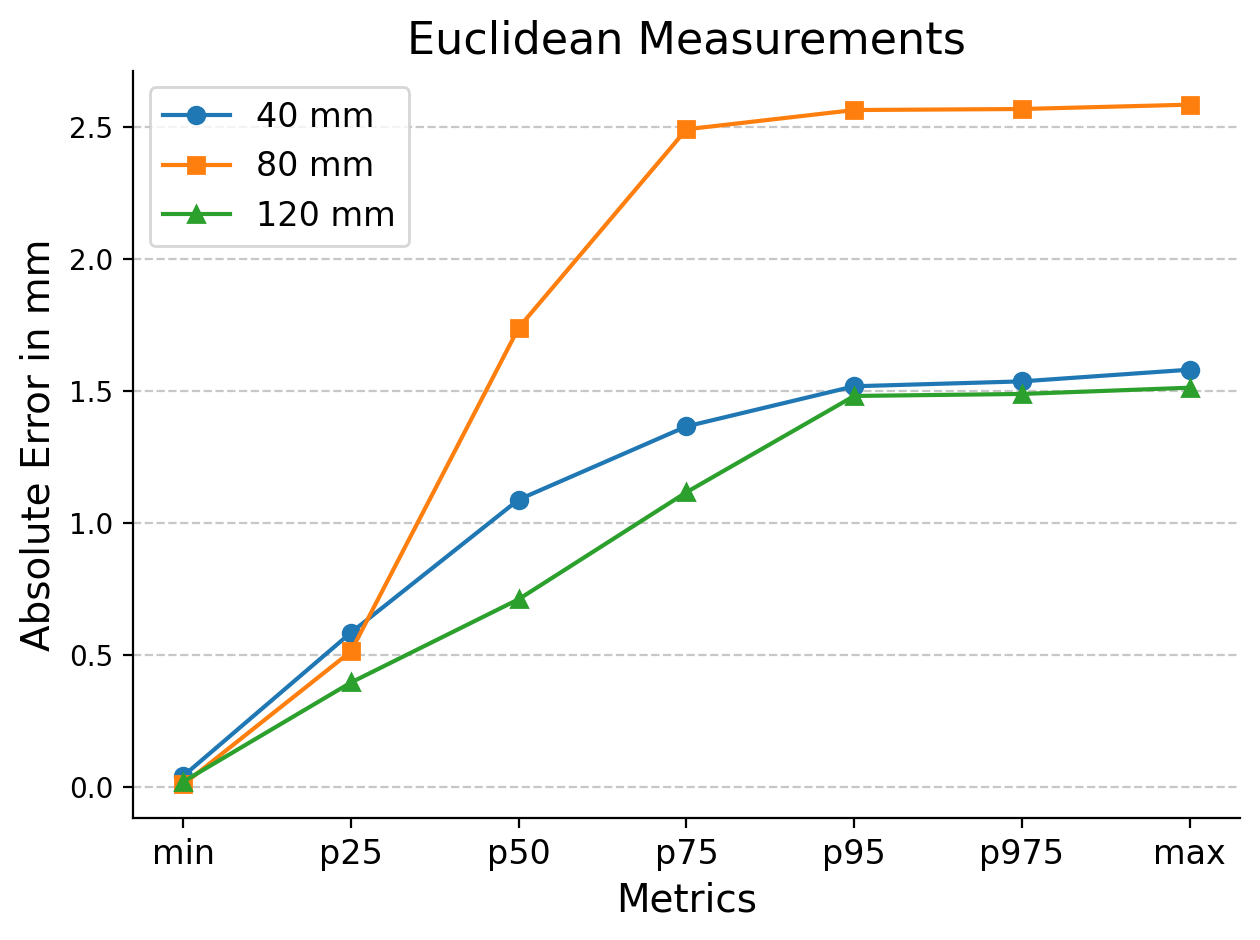

In [8]:
metrics = [metrics_dict['df_40_raft_results'], metrics_dict['df_80_raft_results'], metrics_dict['df_120_raft_results']]
labels = ['40 mm', '80 mm', '120 mm']
# Extract values of interest
keys = ['min', 'p25', 'p50', 'p75', 'p95', 'p975', 'max']
values = [[m[key] for key in keys] for m in metrics]

# Set up the plot
fig, ax = plt.subplots(dpi=200)

# Plot the data as line plots
x = np.arange(len(keys))
markers = ['o', 's', '^']
for i, val in enumerate(values):
    ax.plot(x, val, marker=markers[i], label=labels[i])

# Customize plot appearance
ax.set_xticks(x)
ax.set_xticklabels(keys, fontsize=12)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Absolute Error in mm', fontsize=14)
ax.set_title('Euclidean Measurements', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# 02. Boxplots

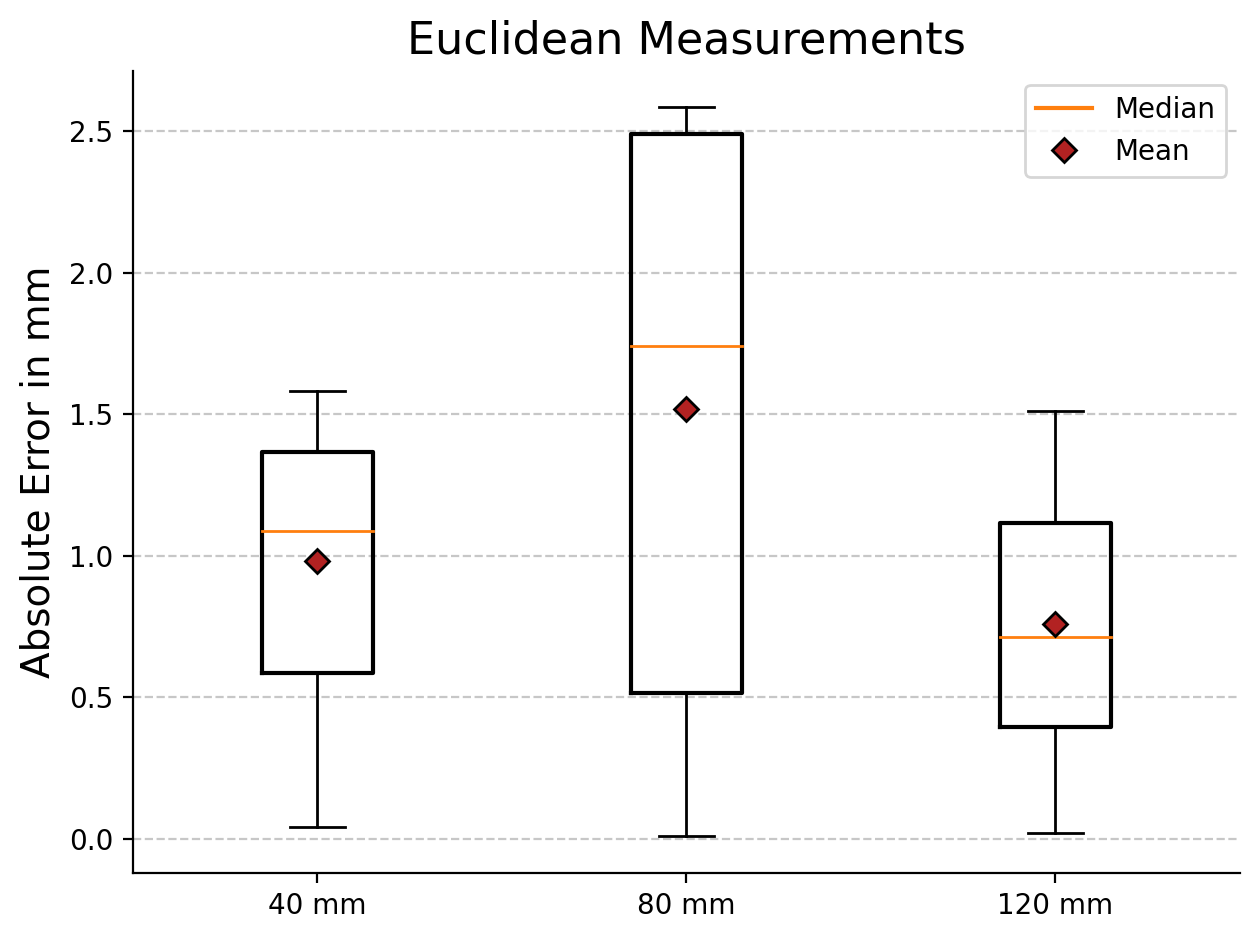

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Replace these with your actual numpy arrays for the mean absolute errors (maes)
mae_40 = dataframes['df_40_raft_results']['euclidian_diff'].to_numpy()
mae_80 = dataframes['df_80_raft_results']['euclidian_diff'].to_numpy()
mae_120 = dataframes['df_120_raft_results']['euclidian_diff'].to_numpy()

maes = [mae_40, mae_80, mae_120]
labels = ['40 mm', '80 mm', '120 mm']

# Set up the plot
fig, ax = plt.subplots(dpi=200)

# Boxplot properties
boxprops = dict(linestyle='-', linewidth=1.5)
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick', markersize=6)

# Create the boxplot
ax.boxplot(maes, labels=labels, boxprops=boxprops, meanprops=meanprops, showmeans=True, meanline=False)

ax.set_ylabel('Absolute Error in mm', fontsize=14)
ax.set_title('Euclidean Measurements', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], color='C1', lw=1.5, label='Median'),
    Line2D([0], [0], marker='D', color='w', markeredgecolor='k', markerfacecolor='firebrick', markersize=6, label='Mean')
]

# Add the legend
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()